In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Rules

Define function to test and get the exact value of the integral.

Additionally define methods for evaluating integrals and computing relative errors

In [2]:
def testFunction(x):
    return np.cos(x)*np.exp(-x/5)

def integral(x):
    return -(5/26)*np.exp(-x/5)*(np.cos(x) - 5*np.sin(x))

In [3]:
def evaluateMethod(method):
    '''
    Hard code start, finish, testFunction and numberOfSteps - no need for variety now.
    '''
    return np.array([method(start, finish, n, testFunction) for n in numberOfSteps])

def relativeError(value, exactIntegral):
    return (value - exactIntegral)/exactIntegral

Define range for testing and compare results

In [4]:
start = -10
finish = 10

numberOfSteps = [ 3, 5, 8, 10, 20, 30, 50, 80 ,100, 130, 150, 400, 700 ,1000]

exactIntegral = integral(finish) - integral(start)

In [5]:
Lobatto = evaluateMethod(Rules.Lobatto)
Lobatto = relativeError(Lobatto, exactIntegral)

Legendre = evaluateMethod(Rules.Legendre)
Legendre = relativeError(Legendre, exactIntegral)

Midpoint = evaluateMethod(Rules.midpoint)
Midpoint = relativeError(Midpoint, exactIntegral)

Trapezoid = evaluateMethod(Rules.trapezoid)
Trapezoid = relativeError(Trapezoid, exactIntegral)

Simpson = evaluateMethod(Rules.simpsons)
Simpson = relativeError(Simpson, exactIntegral)

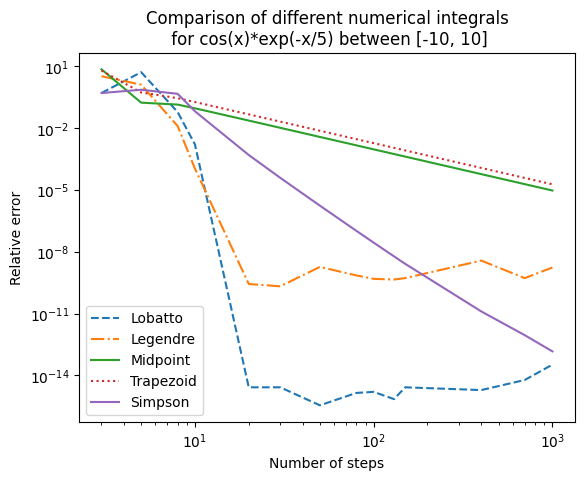

In [6]:
plt.plot(numberOfSteps, abs(Lobatto), ls = '--', label = 'Lobatto')
plt.plot(numberOfSteps, abs(Legendre), ls = '-.', label = 'Legendre')
plt.plot(numberOfSteps, abs(Midpoint), ls = '-', label = 'Midpoint')
plt.plot(numberOfSteps, abs(Trapezoid), ls = ':', label = 'Trapezoid')
plt.plot(numberOfSteps, abs(Simpson), ls = '-', label = 'Simpson')

plt.xscale('log')
plt.yscale('log')

plt.title(f'Comparison of different numerical integrals\n for cos(x)*exp(-x/5) between [{start}, {finish}]')
plt.xlabel('Number of steps')
plt.ylabel('Relative error')
plt.legend()
plt.show()
#plt.savefig('comparison.jpg', dpi = 300)
